<a href="https://colab.research.google.com/github/larissamazzero/RMN/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Components Analysis (PCA)

##Definição

A análise de componentes principais (PCA) é uma técnica utilizada para identificação de um número menor de variáveis (não correlacionadas entre si) sobre um conjunto maior de dados, conhecidas como componentes principais.


O PCA é considerado um método estatístico útil e muito utilizado em compressões de imagens, reconhecimento facial, neurociência, computação gráfica e entre outros campos que possuem grandes 
volumes de variáveis e que precisam reduzir suas dimensões para facilitar o 
trabalho com os dados.


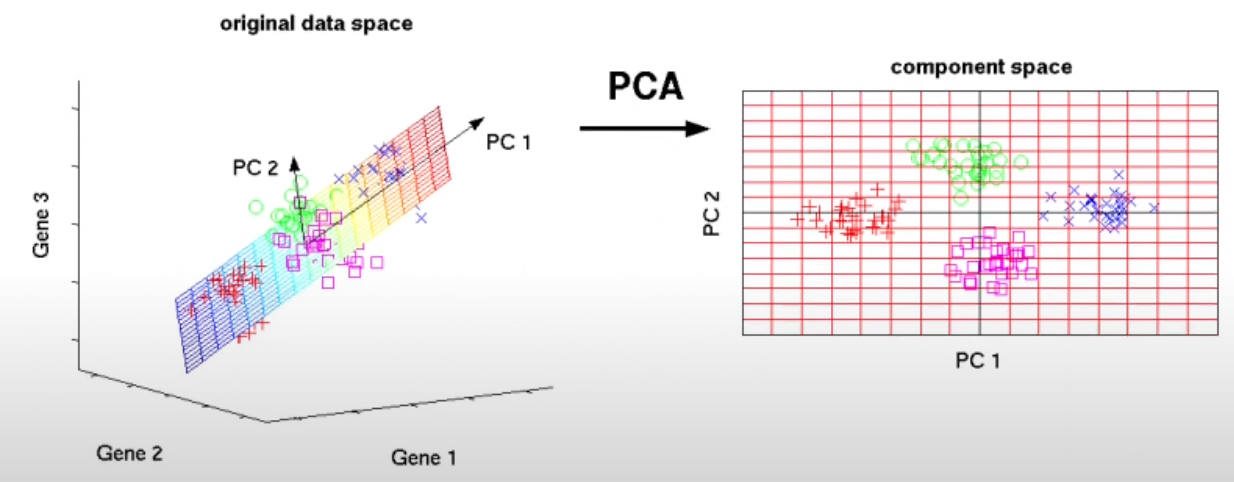

##Casos de uso



Grandes dimensões são difíceis de treinar pois precisam de mais poder computacional, tempo de processamento, mais espaço de armazenamento além de tornar difícil a visualização dos dados. 

Sendo assim, pode ser usado para reduzir a dimensão dos recursos, potencialmente levando a um melhor desempenho para o algoritmo de aprendizagem, removendo recursos redundantes, obsoletos e altamente correlacionados.







##Funcionamento

PCA pode ser pensado como um problema de aprendizado não supervisionado.

Através da combinação da covariância com a transformação linear, captura padrões em um conjunto de dados e é extraído um conjunto de recursos de baixa dimensão (conhecido como componentes principais), fazendo uma projeção de dimensões irrelevantes de um conjunto de dados de alta dimensão (muitas variáveis) com o objetivo de capturar o máximo de informações possíveis.



Todo o processo de obtenção dos principais componentes apartir de um conjunto de dados brutos pode ser simplificado em cinco partes:










*   Em um conjunto de dados com três ou mais dimensões (*d+1*) e somente com valores numéricos é calculada a média e desvio padrão para cada dimensão de todo o conjunto de dados afim de padronizar as escalas:

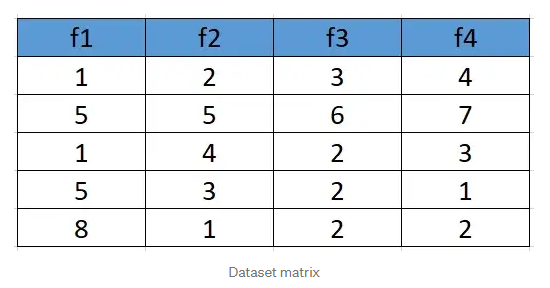


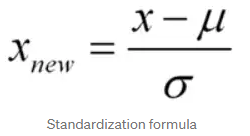

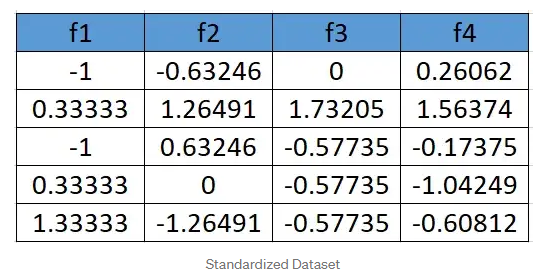

*   Após a média é calculado a matriz de covariânvia de todo o conjunto de dados:

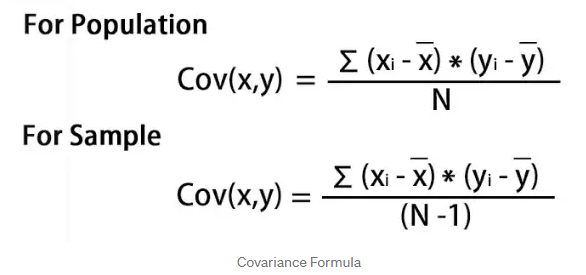

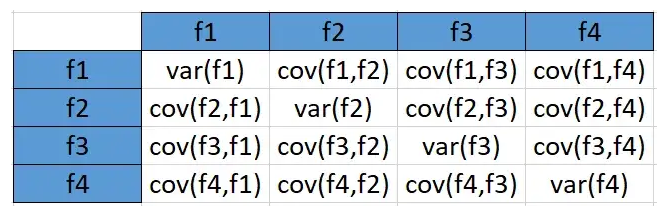

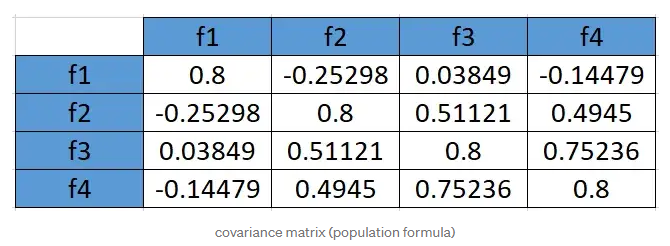


*   É calculado os autovetores e os autovalores correspondentes:

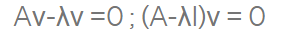

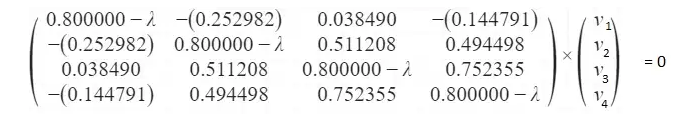

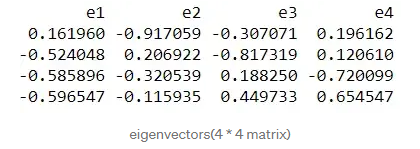


*   É organizado os autovetores decrescendo os autovalores e é escolhido *k* autovetores com os maiores autovalores para formar uma matriz **W** de *d x k* 
dimensões:

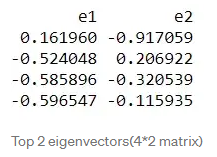


*   Por fim é utilizado essa matriz de autovetor *d x k* para transformar as amostras originais em uma nova matriz sobrescrita:

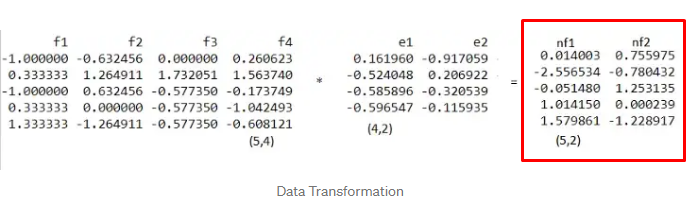

Esses componentes principais tem uma porcentagem explicativa sobre o total de variáveis presentes.

Com menos variáveis obtidas e ao mesmo tempo minimizando a perda de informações, a visualização também se torna muito mais significativa.

**PCA é mais útil ao lidar com dados tridimensionais ou superiores, ou seja, três ou mais variáveis.**

##Requisitos


**Antes de aplicar a técnica, as variáveis precisam ser numéricas e estarem no mesmo padrão de unidade de medida.**

Os componentes principais são fornecidos com a versão normalizada dos preditores originais, isso ocorre porque os preditores originais podem ter escalas diferentes.

##Exemplo de aplicação

Neste exemplo utilizaremos um conjunto de dados de tamanhos de pétalas de plantas apenas para ilustrar o funcionamento da técnica PCA:

In [ ]:
import pandas as pd

# Carregando o dataset e visualizando as primeiras linhas
df = pd.read_csv("/content/Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Selecionando apenas as colunas que desejamos trabalhar
df2 = df.iloc[:,1:5]
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Verificando se os dados selecionados são numéricos
df2.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [ ]:
from sklearn.decomposition import PCA

# Criando o objeto PCA com o número de componentes e adequando aos dados
pca = PCA(n_components=2)
pca.fit(df2)

PCA(n_components=2)

In [ ]:
# Visualizando a porcentagem de explicação de cara componente
comp1 = list(pca.explained_variance_ratio_)[0]*100
comp2 = list(pca.explained_variance_ratio_)[1]*100

print('Porcentagem componente 1: {0:.2f}%'.format(comp1))
print('Porcentagem componente 2: {0:.2f}%'.format(comp2))

92.46%
5.30%


In [ ]:
# Visualizando o valor de cada componente
var1 = list(pca.singular_values_)[0]
var2 = list(pca.singular_values_)[1]
print(f'Valor do componente 1: {var1}')
print(f'Valor do componente 2: {var2}')

25.089863978899867
6.007852542506335
